[Question 2]: https://chat.openai.com/share/71396409-e491-4f84-a863-331114723848


# Assignment 1:
Liam Salass - 20229595 - 19lh`s4


### Q2
My gpt chat for [Question 2]

My chat with copilot:
Pearson's correlation coefficient is a measure of the linear correlation between two variables. It has a value between +1 and -1, where +1 is total positive linear correlation, 0 is no linear correlation, and -1 is total negative linear correlation.

In the context of the provided code, the Pearson's correlation is being used to measure the relationship between the year a house was built ('YEAR BUILT') and its sale price ('SALE PRICE').

If the correlation coefficient is close to +1, it would mean that there's a strong positive relationship between the year a house was built and its price, i.e., newer houses tend to be more expensive. If it's close to -1, it would mean there's a strong negative relationship, i.e., older houses tend to be more expensive. If it's close to 0, it would mean that there's no significant linear relationship between the year a house was built and its price.


NOTE: I have copilot installed which gives me inline suggestions, there is no chat data for me to share. If you have any issues with my use of it please email me at liam.salass@queensu.ca



In [160]:
#Imports
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [161]:

# Combine the dataset 
if not os.path.exists('combined_data.csv'):
    expected_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
                        'BLOCK', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 
                        'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 
                        'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 
                        'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 
                        'SALE PRICE', 'SALE DATE']
    
    combined_data = pd.DataFrame(columns=expected_columns)
    
    data_directory = 'data'
    
    for file_name in tqdm(os.listdir(data_directory)):
        if file_name.endswith('.xlsx'):
            file_path = os.path.join(data_directory, file_name)
            file_data = pd.read_excel(file_path, usecols=range(21))
            file_data.columns = expected_columns
            combined_data = pd.concat([combined_data, file_data], ignore_index=True)
    
    combined_data.to_csv('combined_data.csv', index=False)

else: 
    print ("File already exists")


File already exists


In [162]:
# Q1

data = pd.read_csv('combined_data.csv')

house_price_stats = data.groupby('BOROUGH')['SALE PRICE'].describe()

house_types = data['BUILDING CLASS CATEGORY'].value_counts()

missing_values = data.isnull().sum()

print("House Price Statistics for Each Borough:")
print(house_price_stats)
print("\nTypes of Houses in the Dataset:")
print(house_types)
print("\nMissing Values in the Dataset:")
print(missing_values)


House Price Statistics for Each Borough:
           count          mean           std  min       25%       50%  \
BOROUGH                                                                 
1        60811.0  3.061302e+06  1.797242e+07  0.0  424900.0  950000.0   
2        20595.0  8.345662e+05  3.679381e+06  0.0       0.0  335000.0   
3        76123.0  1.204338e+06  4.810175e+06  0.0       0.0  605000.0   
4        81547.0  9.485063e+05  6.769305e+06  0.0       0.0  395000.0   
5        25259.0  5.405466e+05  1.341385e+06  0.0       0.0  489000.0   

               75%           max  
BOROUGH                           
1        2175000.0  1.033000e+09  
2         725000.0  1.190000e+08  
3        1202871.0  3.177926e+08  
4         816625.0  3.177926e+08  
5         700000.0  5.870000e+07  

Types of Houses in the Dataset:
BUILDING CLASS CATEGORY
01 ONE FAMILY DWELLINGS                       56600
02 TWO FAMILY DWELLINGS                       47577
13 CONDOS - ELEVATOR APARTMENTS          

# Q1
## 1. Statiscis of house price per borough
Borough 1 (Manhattan): Mean - $3,061,302, Median - $950,000, Max - $1,033,000,000

Borough 2 (Bronx): Mean  - $834,566, Median - $335,000, Max - $119,000,000

Borough 3 (Brooklyn): Mean - $1,204,338, Median - $605,000, Max - $317,792,600

Borough 4 (Queens): Mean - $948,506, Median - $395,000, Max - $317,792,600

Borough 5 (Staten Island): Mean - $540,546, Median - $489,000, Max - $58,700,000


## 2. Types of houses
One Family Dwellings (56,600 occurrences)

Two Family Dwellings (47,577 occurrences)

Condos - Elevator Apartments (44,114 occurrences)

Coops - Elevator Apartments (42,903 occurrences)

Three Family Dwellings (13,450 occurrences)


## 3. Missing Values
EASE-MENT: All values are missing (264,335 missing values)

APARTMENT NUMBER: 198,878 missing values

COMMERCIAL UNITS: 113,744 missing values

LAND SQUARE FEET, GROSS SQUARE FEET: 121,998 missing values each

RESIDENTIAL UNITS: 64,181 missing values

YEAR BUILT: 18,007 missing values

# Q2
## Question 1: Is there a significant difference in the recovery of prices between different types of houses in the Manhattan and Queens borough post-COVID-19?
Different types of housing might recover at different rates. Queens and Manhattan have the largest mean house pricing and most variance. An evaluation of the variance of different housing types prices as time progresses post covid can show which types of housing are less prone to change.

Analysis of variance can be used to better understand the magnitude in change in a certain type of houses price post covid. A higher variance indicates that the type of house being analysized is less resiliant to change in pricing post-epidemic. 

## Answer 1: 
From my tests, the results concluded that most types of condos had the least amount of variance while luxury hotles and warehouses had the most variance. The magnitude in difference in variance between the bottom and top was about a magnitudude of 10, meaning that the difference in change is very large between these different types of buildings. These findings conclude that  

## Question 2: Is there a significant correlation between the year a house is built and it's price post-COVID-19 for the Queens and Manhattan boroughs?
This question will shed light on the impact of age on a houses price resiliance. The age of a building can be correlated with the need for maintenance or renovation, which can significanlty affect it's market value. 

Either there is no correlation between the year of a house is built or there is a correlation. If there is a correlation, is it that older building are more or less resiliant than newer buildings. 

## Answer 2: 



In [163]:
#Q2
# Question 1: Is there a significant difference in the recovery of prices between different types of houses in the Manhattan and Queens borough post-COVID-19?
manhattan_data = data[data['BOROUGH'] == 1]
queens_data = data[data['BOROUGH'] == 4]

manhattan_variance = manhattan_data.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].var()
queens_variance = queens_data.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].var()

manhattan_variance = manhattan_variance[manhattan_variance != 0]
queens_variance = queens_variance[queens_variance != 0]

print ("Manhattan Variance top 3:")
print (manhattan_variance.nlargest(3))
print ("\nQueens Variance top 3:")
print (queens_variance.nlargest(3))
print ("\nManhattan Variance bottom 3:")
print (manhattan_variance.nsmallest(3))
print ("\nQueens Variance bottom 3:")
print (queens_variance.nsmallest(3))

Manhattan Variance top 3:
BUILDING CLASS CATEGORY
34 THEATRES         2.311482e+17
30 WAREHOUSES       1.061896e+16
25 LUXURY HOTELS    9.423928e+15
Name: SALE PRICE, dtype: float64

Queens Variance top 3:
BUILDING CLASS CATEGORY
25 LUXURY HOTELS                     2.067818e+16
49 CONDO WAREHOUSES/FACTORY/INDUS    1.164333e+15
31 COMMERCIAL VACANT LAND            6.229463e+14
Name: SALE PRICE, dtype: float64

Manhattan Variance bottom 3:
BUILDING CLASS CATEGORY
40 SELECTED GOVERNMENTAL FACILITIES          7.053333e+10
42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC    7.284143e+11
48 CONDO TERRACES/GARDENS/CABANAS            9.180387e+11
Name: SALE PRICE, dtype: float64

Queens Variance bottom 3:
BUILDING CLASS CATEGORY
17 CONDO COOPS                       8.719230e+10
15 CONDOS - 2-10 UNIT RESIDENTIAL    1.134807e+11
04 TAX CLASS 1 CONDOS                1.325531e+11
Name: SALE PRICE, dtype: float64


In [164]:
# Q2
# Question 2: Is there a significant correlation between the year a house is built and it's price post-COVID-19?
m_q_data = data[data['BOROUGH'].isin([1,4])]
num_rows = len(m_q_data)
print ('Number of rows before dropping NaNs: ' + str(num_rows))
m_q_data = m_q_data[['YEAR BUILT', 'SALE PRICE']]
m_q_data = m_q_data.dropna()
m_q_data = m_q_data[m_q_data['YEAR BUILT'] != 0]
print ('Number of rows removed: ' + str(num_rows - len(m_q_data)))

m_q_data['YEAR BUILT'] = m_q_data['YEAR BUILT'].astype(int)
m_q_data['SALE PRICE'] = m_q_data['SALE PRICE'].astype(int)


corr, _ = stats.pearsonr(m_q_data['YEAR BUILT'], m_q_data['SALE PRICE'])

print('Pearsons correlation: %.3f' % corr)
if corr < 0.1:
    print('There is no correlation between the year a house is built and it\'s price post-COVID-19')
else:
    if corr < 0:
        print('There is a negative correlation between the year a house is built and it\'s price post-COVID-19')
    else:
        print('There is a positive correlation between the year a house is built and it\'s price post-COVID-19')
    




Number of rows before dropping NaNs: 142358
Number of rows removed: 9477
Pearsons correlation: 0.046
There is no correlation between the year a house is built and it's price post-COVID-19


# Q3
As you can see from the below plot, on average condos have had the highest average cost over time, followed by the coop housing, and then the 1 family homes. This is due to the evaluation of sale price correlating to the total size of the structure. Condos and coops are much larger structures and the sale price is associated with the buildings cost, not the per unit cost. 

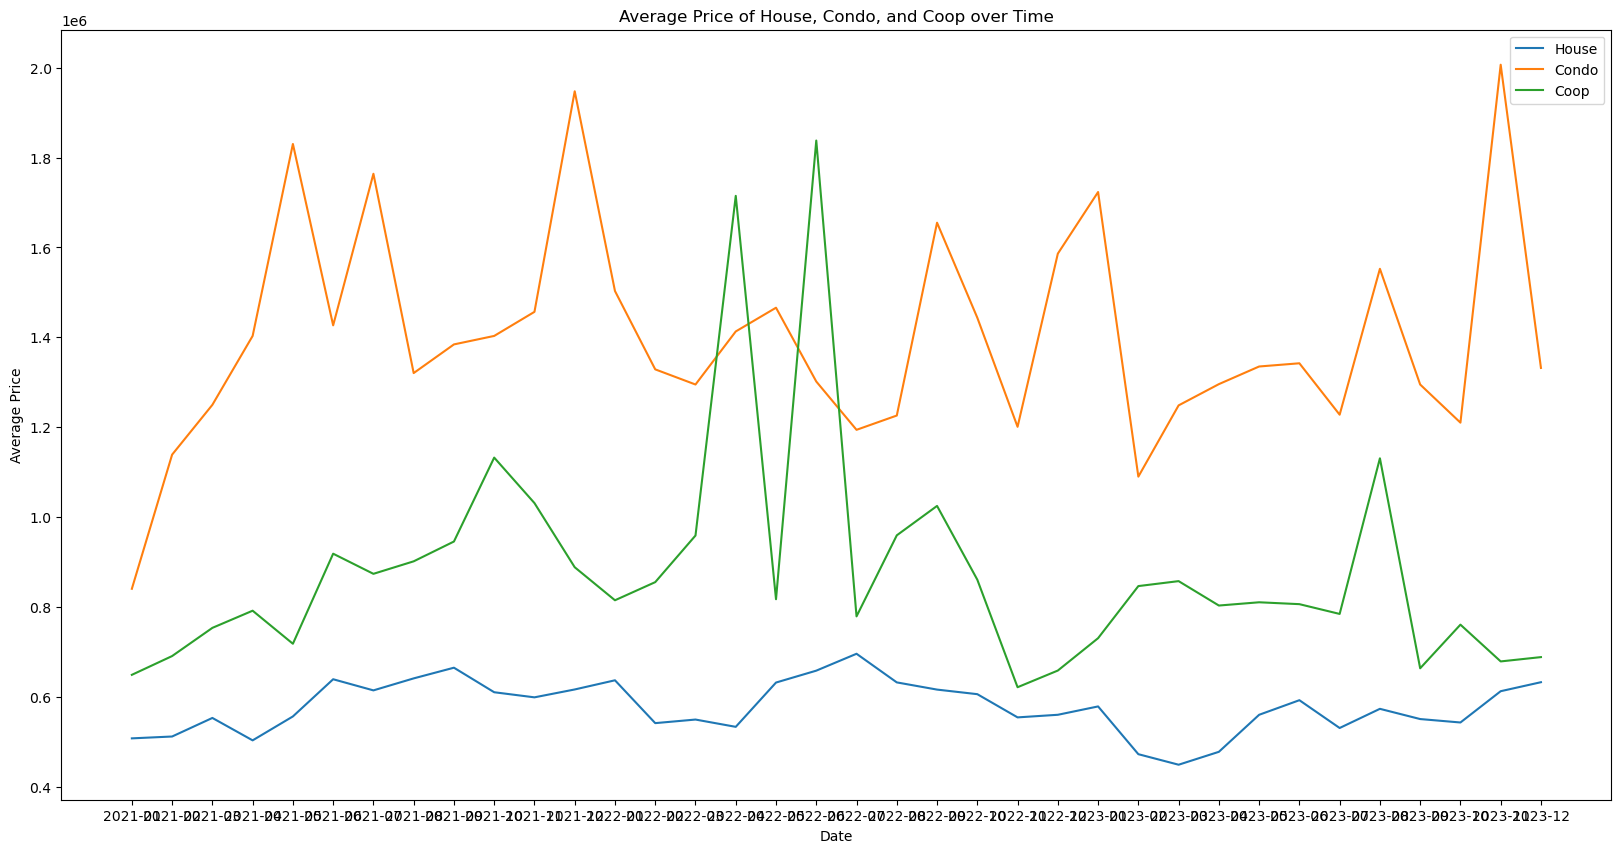

In [165]:
# Q3 
# NOTE: Do you want us to ONLY look at houses? So that being the 01, 02, and 03 categories? Or do you want us to look at all the categories?
# I'm assuming we're looking at all the categories

#print ("\nTypes of Houses in the Dataset:")
#print (house_types)

house_data = data[data['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']
house_data = house_data[['SALE PRICE', 'SALE DATE']]

condo_data = data[data['BUILDING CLASS CATEGORY'] == '15 CONDOS - 2-10 UNIT RESIDENTIAL']
condo_data = condo_data[['SALE PRICE', 'SALE DATE']]

coop_data = data[data['BUILDING CLASS CATEGORY'] == '10 COOPS - ELEVATOR APARTMENTS']
coop_data = coop_data[['SALE PRICE', 'SALE DATE']]

house_data['SALE DATE'] = pd.to_datetime(house_data['SALE DATE'])
house_data['SALE DATE'] = house_data['SALE DATE'].dt.strftime('%Y-%m')

condo_data['SALE DATE'] = pd.to_datetime(condo_data['SALE DATE'])
condo_data['SALE DATE'] = condo_data['SALE DATE'].dt.strftime('%Y-%m')

coop_data['SALE DATE'] = pd.to_datetime(coop_data['SALE DATE'])
coop_data['SALE DATE'] = coop_data['SALE DATE'].dt.strftime('%Y-%m')

house_data = house_data.groupby('SALE DATE')['SALE PRICE'].mean()
condo_data = condo_data.groupby('SALE DATE')['SALE PRICE'].mean()
coop_data = coop_data.groupby('SALE DATE')['SALE PRICE'].mean()

plt.figure(figsize=(20,10))
plt.plot(house_data, label='House')
plt.plot(condo_data, label='Condo')
plt.plot(coop_data, label='Coop')
plt.legend()
plt.title('Average Price of House, Condo, and Coop over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')

plt.show()


# Q4 

#### Reasoning for one family dwellings
Based on the higher degree of linearity in the for the one family dwelling category of buildings, I've decided to do my regression on that portion of the dataset as it will be easier for the model to fit the data and predict future costs of houses. 


In [166]:
# Q4 and Q5
house_data = data[data['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']
num_rows = len(house_data)

# print('Columns with missing values:')
# print(house_data.isnull().sum())

# Drop the columns with more than 100 missing values and drop the rows with missing values
house_data = house_data.dropna(axis=1, thresh=100)
house_data = house_data.dropna(axis=0)
#print ('Number of rows before dropping NaNs: ' + str(num_rows))
#print ('Number of rows removed: ' + str(num_rows - len(house_data)))

house_data = house_data[['SALE DATE', 'SALE PRICE']]
house_data['SALE DATE'] = pd.to_datetime(house_data['SALE DATE'])
house_data['SALE DATE'] = house_data['SALE DATE'].dt.strftime('%Y-%m')
house_data = house_data.groupby('SALE DATE')['SALE PRICE'].mean()


X = np.arange(len(house_data)).reshape(-1, 1)
y = house_data.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))



Mean Absolute Error: 29918.871680128068
Mean Squared Error: 1482794740.0044627
R2 Score: -0.2731587657083401
Root Mean Squared Error: 38507.07389564238


# Q5

From the heatmap below, you can see that there is a degree of multicolinearity in the data, however these were between labels that obviously strongly influence each other. For example, total units, commercial units, and residential units.  

c:\Users\Liam\anaconda3\envs\data_analytics\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


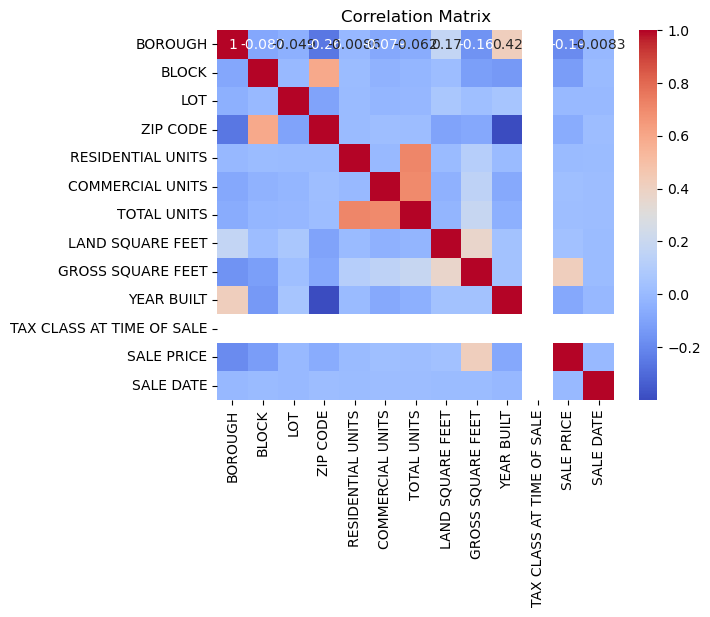

SALE PRICE                   1.000000
GROSS SQUARE FEET            0.418863
BOROUGH                      0.188509
BLOCK                        0.121485
YEAR BUILT                   0.080748
ZIP CODE                     0.065475
LAND SQUARE FEET             0.035186
COMMERCIAL UNITS             0.021533
TOTAL UNITS                  0.016199
LOT                          0.005804
SALE DATE                    0.004480
RESIDENTIAL UNITS            0.001505
TAX CLASS AT TIME OF SALE         NaN
Name: SALE PRICE, dtype: float64


In [167]:
# Q5
house_data = data[data['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS']
num_rows = len(house_data)

house_data = house_data.dropna(axis=1, thresh=100)
house_data = house_data.dropna(axis=0)

# Convert Sale date to numeric
house_data['SALE DATE'] = pd.to_datetime(house_data['SALE DATE']).astype('int64') / 10**9

# get correlation between each column and sale price, and each column with each other
# don't include non-numeric columns
house_data = house_data.select_dtypes(include=np.number)
house_data = house_data.corr()

sns.heatmap(house_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# the correlation between each column and sale price regargless of direction of correlation
print(house_data['SALE PRICE'].abs().sort_values(ascending=False))

# Q6

The below code is a comparison of Model A, using only the date and time to calculate the linear regression model, and Model B, using the highest correlating column, gross square feet. 

Model A was the clear winner having far less of a error than Model B, even though gross square feet has a higher degree of correlation than the gross square feet. This could be due to the relation ship between gross square feet and sale price being non linear. 

In [168]:
# Q6
house_data = data[data['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS'] 
num_rows = len(house_data)

house_data = house_data.dropna(axis=1, thresh=100)
house_data = house_data.dropna(axis=0)

house_data_mA = house_data[['SALE DATE', 'SALE PRICE']]
house_data_mB = house_data[['SALE PRICE', 'GROSS SQUARE FEET']]

house_data_mA['SALE DATE'] = pd.to_datetime(house_data_mA['SALE DATE'])
house_data_mA['SALE DATE'] = house_data_mA['SALE DATE'].dt.strftime('%Y-%m')

# get the mean of sale price for each month
house_data_mA = house_data_mA.groupby('SALE DATE')['SALE PRICE'].mean()
house_data_mB = house_data_mB.groupby('GROSS SQUARE FEET')['SALE PRICE'].mean()

# Get the same split for both datasets
X1 = np.arange(len(house_data_mA)).reshape(-1, 1)
y1 = house_data_mA.values.reshape(-1, 1)

X2 = np.arange(len(house_data_mB)).reshape(-1, 1)
y2 = house_data_mB.values.reshape(-1, 1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=False)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=False)

regressor1 = LinearRegression()
regressor2 = LinearRegression()

regressor1.fit(X1_train, y1_train)
regressor2.fit(X2_train, y2_train)

y1_pred = regressor1.predict(X1_test)
y2_pred = regressor2.predict(X2_test)

print ('Model A:')
print ('\tMean Absolute Error:', mean_absolute_error(y1_test, y1_pred))
print ('\tMean Squared Error:', mean_squared_error(y1_test, y1_pred))
print ('\tR2 Score:', r2_score(y1_test, y1_pred))
print ('\tRoot Mean Squared Error:', np.sqrt(mean_squared_error(y1_test, y1_pred)))

print ('Model B:')
print ('\tMean Absolute Error:', mean_absolute_error(y2_test, y2_pred))
print ('\tMean Squared Error:', mean_squared_error(y2_test, y2_pred))
print ('\tR2 Score:', r2_score(y2_test, y2_pred))
print ('\tRoot Mean Squared Error:', np.sqrt(mean_squared_error(y2_test, y2_pred)))


C:\Users\Liam\AppData\Local\Temp\ipykernel_6952\1025275380.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_mA['SALE DATE'] = pd.to_datetime(house_data_mA['SALE DATE'])


Model A:
	Mean Absolute Error: 29918.871680128068
	Mean Squared Error: 1482794740.0044627
	R2 Score: -0.2731587657083401
	Root Mean Squared Error: 38507.07389564238
Model B:
	Mean Absolute Error: 3416532.132331764
	Mean Squared Error: 52084171546119.57
	R2 Score: -0.10603881719932651
	Root Mean Squared Error: 7216936.437722004


C:\Users\Liam\AppData\Local\Temp\ipykernel_6952\1025275380.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data_mA['SALE DATE'] = house_data_mA['SALE DATE'].dt.strftime('%Y-%m')
